Lab Instructions

Scenario: You're working at a retail chain analyzing inventory turnover. The store manager needs to understand stock movement patterns to optimize ordering.

Data Structure: DataFrame

product_id
category
stock_level
last_restock_date
sales_last_30_days
supplier_lead_time
unit_cost

Task: Generate code to:

Calculate inventory turnover rates.
Identify slow-moving items.
Predict potential stockouts.
Create visualizations.

Model this framework for each task:
# Your Prompt:
[Copy your prompt here]

# Generated Code:
[Copy the AI-generated code]

# Follow-up Prompts:
[List any clarifying prompts you used]

# Final Solution:
[Your working code after refinements]

0. Generate the dataframe

Prompt:

I'm working on a theoretical inventory analysis report that looks at inventory turnover to optimize ordering. Before getting to specific questions, I need to generate a dataframe with the following headings: 

product_id
category
stock_level
last_restock_date
sales_last_30_days
supplier_lead_time
unit_cost

Provide Python code that creates this dataframe and populates it with 30 rows of random data.

In [ ]:
#Generated code

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Seed for reproducibility
np.random.seed(42)

# Sample categories
categories = ['Electronics', 'Apparel', 'Home & Kitchen', 'Books', 'Sports', 'Health']

# Generate random data
num_rows = 30
data = {
    'product_id': [f'P{str(i).zfill(4)}' for i in range(1, num_rows + 1)],
    'category': np.random.choice(categories, size=num_rows),
    'stock_level': np.random.randint(0, 500, size=num_rows),
    'last_restock_date': [datetime.today() - timedelta(days=random.randint(1, 60)) for _ in range(num_rows)],
    'sales_last_30_days': np.random.randint(0, 300, size=num_rows),
    'supplier_lead_time': np.random.randint(2, 21, size=num_rows),  # days
    'unit_cost': np.round(np.random.uniform(5.0, 500.0, size=num_rows), 2)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   product_id        category  stock_level          last_restock_date  \
0       P0001           Books           58 2025-02-18 10:22:34.213251   
1       P0002          Sports          169 2025-02-28 10:22:34.213265   
2       P0003  Home & Kitchen          475 2025-02-23 10:22:34.213268   
3       P0004          Sports          187 2025-04-07 10:22:34.213270   
4       P0005          Sports          463 2025-02-10 10:22:34.213271   
5       P0006         Apparel          270 2025-03-22 10:22:34.213273   
6       P0007  Home & Kitchen          189 2025-03-28 10:22:34.213274   
7       P0008  Home & Kitchen          445 2025-04-08 10:22:34.213275   
8       P0009  Home & Kitchen          174 2025-02-10 10:22:34.213277   
9       P0010          Sports          445 2025-04-01 10:22:34.213278   
10      P0011           Books           50 2025-02-27 10:22:34.213279   
11      P0012  Home & Kitchen          363 2025-03-24 10:22:34.213280   
12      P0013          Health           54 2025-02-

Follow-Up Prompts:

Great start. last_restock_date should be in MM/DD/YYYY format. No timestamp needed.

In [2]:
#Final Solution

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Seed for reproducibility
np.random.seed(42)

# Sample categories
categories = ['Electronics', 'Apparel', 'Home & Kitchen', 'Books', 'Sports', 'Health']

# Generate random data
num_rows = 30
data = {
    'product_id': [f'P{str(i).zfill(4)}' for i in range(1, num_rows + 1)],
    'category': np.random.choice(categories, size=num_rows),
    'stock_level': np.random.randint(0, 500, size=num_rows),
    'last_restock_date': [(datetime.today() - timedelta(days=random.randint(1, 60))).strftime('%m/%d/%Y') for _ in range(30)],
    'sales_last_30_days': np.random.randint(0, 300, size=num_rows),
    'supplier_lead_time': np.random.randint(2, 21, size=num_rows),  # days
    'unit_cost': np.round(np.random.uniform(5.0, 500.0, size=num_rows), 2)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   product_id        category  stock_level last_restock_date  \
0       P0001           Books           58        02/22/2025   
1       P0002          Sports          169        03/30/2025   
2       P0003  Home & Kitchen          475        04/04/2025   
3       P0004          Sports          187        02/11/2025   
4       P0005          Sports          463        04/02/2025   
5       P0006         Apparel          270        03/25/2025   
6       P0007  Home & Kitchen          189        02/18/2025   
7       P0008  Home & Kitchen          445        02/09/2025   
8       P0009  Home & Kitchen          174        02/15/2025   
9       P0010          Sports          445        03/12/2025   
10      P0011           Books           50        03/02/2025   
11      P0012  Home & Kitchen          363        02/18/2025   
12      P0013          Health           54        02/24/2025   
13      P0014          Sports          243        03/29/2025   
14      P0015         Apparel          3

1. Calculate inventory turnover rates. 

Prompt:

As a Data Analyst, I need your help calculating inventory turnover rates. Based on stock_level, sale_last_30_days, and last_restock_date, how long would it take for each product_id to depleat it's existing inventory? Calculate the daily_sales_rate and inventory_duration_days and add them as new columns to the existing dataframe.

In [3]:
# Generated Code

# To calculate inventory turnover duration, you're essentially asking:
# "Based on current sales rates, how many days will it take to sell through the current stock?"
# We can compute this as:
# inventory_duration_days = stock_level / (sales_last_30_days / 30)
# This formula assumes a constant daily sales rate and estimates how long it would take to sell out the current stock_level.
# Here's the Python code to add this calculation to your existing DataFrame:

# Avoid division by zero by using np.where
df['daily_sales_rate'] = df['sales_last_30_days'] / 30

# Calculate inventory duration, handling divide-by-zero safely
df['inventory_duration_days'] = np.where(
    df['daily_sales_rate'] > 0,
    df['stock_level'] / df['daily_sales_rate'],
    np.inf
)

# Round values for readability
df['daily_sales_rate'] = df['daily_sales_rate'].round(2)
df['inventory_duration_days'] = df['inventory_duration_days'].round(1)

# Display updated DataFrame
print(df)

   product_id        category  stock_level last_restock_date  \
0       P0001           Books           58        02/22/2025   
1       P0002          Sports          169        03/30/2025   
2       P0003  Home & Kitchen          475        04/04/2025   
3       P0004          Sports          187        02/11/2025   
4       P0005          Sports          463        04/02/2025   
5       P0006         Apparel          270        03/25/2025   
6       P0007  Home & Kitchen          189        02/18/2025   
7       P0008  Home & Kitchen          445        02/09/2025   
8       P0009  Home & Kitchen          174        02/15/2025   
9       P0010          Sports          445        03/12/2025   
10      P0011           Books           50        03/02/2025   
11      P0012  Home & Kitchen          363        02/18/2025   
12      P0013          Health           54        02/24/2025   
13      P0014          Sports          243        03/29/2025   
14      P0015         Apparel          3

Follow-Up Prompt:

From df, only display columns product_id, category, daily_sales_rate, and inventory_duration_days. Safe this as a new data from called "inventory_rates_df"

In [4]:
inventory_rates_df = (df[['product_id', 'category', 'daily_sales_rate', 'inventory_duration_days']])
print(inventory_rates_df)

   product_id        category  daily_sales_rate  inventory_duration_days
0       P0001           Books              1.73                     33.5
1       P0002          Sports              3.03                     55.7
2       P0003  Home & Kitchen              8.77                     54.2
3       P0004          Sports              1.13                    165.0
4       P0005          Sports              6.83                     67.8
5       P0006         Apparel              2.67                    101.2
6       P0007  Home & Kitchen              1.63                    115.7
7       P0008  Home & Kitchen              0.03                  13350.0
8       P0009  Home & Kitchen              1.77                     98.5
9       P0010          Sports              3.50                    127.1
10      P0011           Books              8.63                      5.8
11      P0012  Home & Kitchen              6.33                     57.3
12      P0013          Health              7.23    

2. Identify slow-moving items

Prompt: 

Next, let's identify slow-moving items. Sort inventory_rates_df by inventory_duraction_days in descending order.

In [5]:
# Sort by inventory duration (descending = slowest moving first)
slow_movers_df = inventory_rates_df.sort_values(by='inventory_duration_days', ascending=False)

# View top slow movers
print(slow_movers_df)

   product_id        category  daily_sales_rate  inventory_duration_days
7       P0008  Home & Kitchen              0.03                  13350.0
25      P0026          Sports              1.73                    181.7
13      P0014          Sports              1.43                    169.5
3       P0004          Sports              1.13                    165.0
9       P0010          Sports              3.50                    127.1
6       P0007  Home & Kitchen              1.63                    115.7
5       P0006         Apparel              2.67                    101.2
8       P0009  Home & Kitchen              1.77                     98.5
4       P0005          Sports              6.83                     67.8
14      P0015         Apparel              5.37                     59.4
11      P0012  Home & Kitchen              6.33                     57.3
23      P0024         Apparel              6.90                     56.1
1       P0002          Sports              3.03    

Follow-Up Prompt:

I'd only like to see product_ids, category, and inventory_duration_days for products with inventory_duration_days great than 60 days

In [6]:
# Filter for slow movers with inventory duration > 60 days
slow_movers_filtered = df[df['inventory_duration_days'] > 60]

# Sort descending
slow_movers_filtered = slow_movers_filtered.sort_values(by='inventory_duration_days', ascending=False)

# Display only the relevant columns
print(slow_movers_filtered[['product_id', 'category', 'inventory_duration_days']])

   product_id        category  inventory_duration_days
7       P0008  Home & Kitchen                  13350.0
25      P0026          Sports                    181.7
13      P0014          Sports                    169.5
3       P0004          Sports                    165.0
9       P0010          Sports                    127.1
6       P0007  Home & Kitchen                    115.7
5       P0006         Apparel                    101.2
8       P0009  Home & Kitchen                     98.5
4       P0005          Sports                     67.8


3. Predict potential stockouts

Prompt: Now let's predict potential stockouts. Using a pandasql query, generate a list of product_ids and categories for products whose inventory_duration_days > supplier_lead_time. This will come from df.

In [7]:
from pandasql import sqldf

# Define the SQL query
query = """
SELECT product_id, category
FROM df
WHERE inventory_duration_days <= supplier_lead_time
"""

# Execute the query
at_risk_stock = sqldf(query, locals())

# Display results
print(at_risk_stock)

  product_id category
0      P0011    Books
1      P0013   Health
2      P0020    Books
3      P0025   Health
4      P0027    Books


Follow-Up Prompt

Select inventory_duration_days and supplier_lead_time as well.

In [8]:
from pandasql import sqldf

# Define the SQL query with the additional columns
query = """
SELECT product_id, category, inventory_duration_days, supplier_lead_time
FROM df
WHERE inventory_duration_days <= supplier_lead_time
"""

# Execute the query
at_risk_stock = sqldf(query, locals())

# Display results
print(at_risk_stock)

  product_id category  inventory_duration_days  supplier_lead_time
0      P0011    Books                      5.8                  12
1      P0013   Health                      7.5                  18
2      P0020    Books                      2.4                   8
3      P0025   Health                     11.2                  13
4      P0027    Books                      1.4                   2


4. Create visualizations

Prompt: Now let's compile some graphs to showcase these findings. 

First, I need a bar graph that has product_id on the x axis and inventory_duration_days on the y axis. Pull this data from slow_movers_df. Title the graph "Inventory Turnover".

Second, we'll create another bar graph with identical labels but pulling from slow_movers_filtered. Title the graph "Slow Moving Product"

Third, I need a line graph that shows a product's inventory_duration_days and supplier_lead_time. The x-axis will product_id, y-axis will be labeled "days". Title the graph "Stockout Risk".

/var/folders/6j/5730h4y12159227rqs8wg2r80000gn/T/ipykernel_67926/1779920865.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_df, palette='Blues_d')


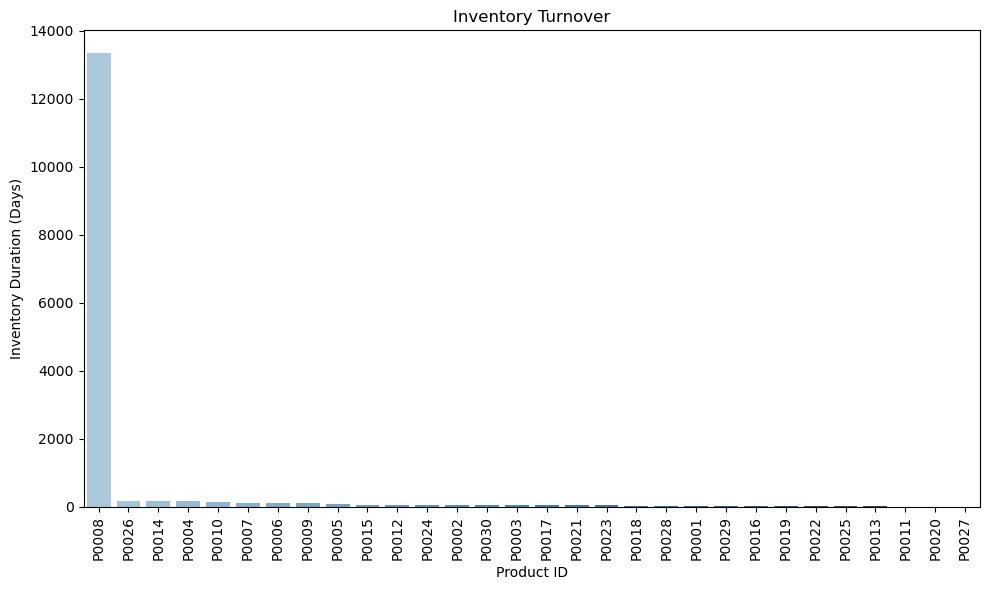

In [9]:
#1. Bar Graph: "Inventory Turnover"

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming slow_movers_df is already available
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_df, palette='Blues_d')
plt.title('Inventory Turnover')
plt.xlabel('Product ID')
plt.ylabel('Inventory Duration (Days)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/var/folders/6j/5730h4y12159227rqs8wg2r80000gn/T/ipykernel_67926/4285231543.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_filtered, palette='Reds_d')


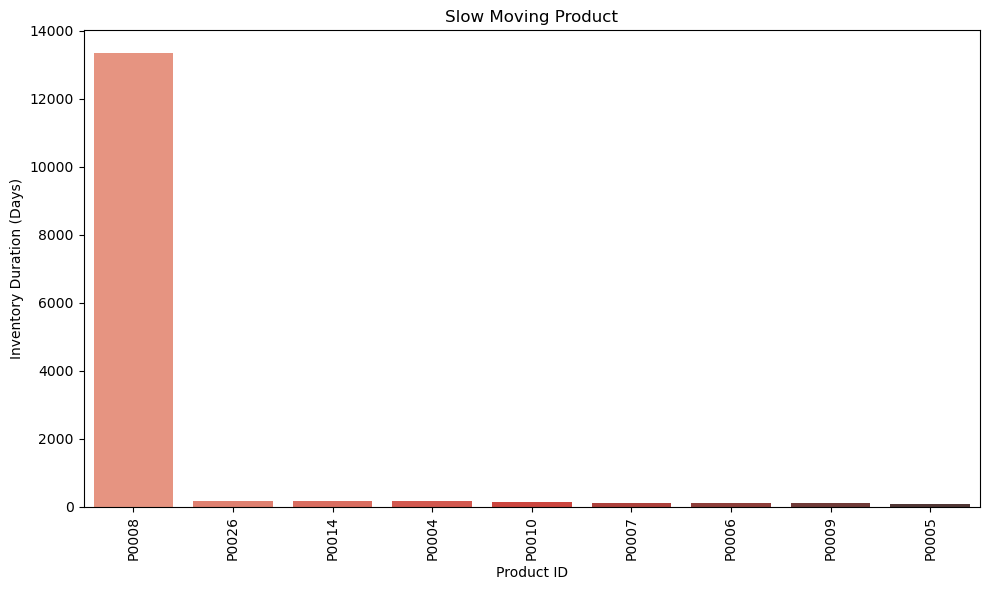

In [10]:
#2. Bar Graph: "Slow Moving Product"

# Assuming slow_movers_filtered is already available
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_filtered, palette='Reds_d')
plt.title('Slow Moving Product')
plt.xlabel('Product ID')
plt.ylabel('Inventory Duration (Days)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

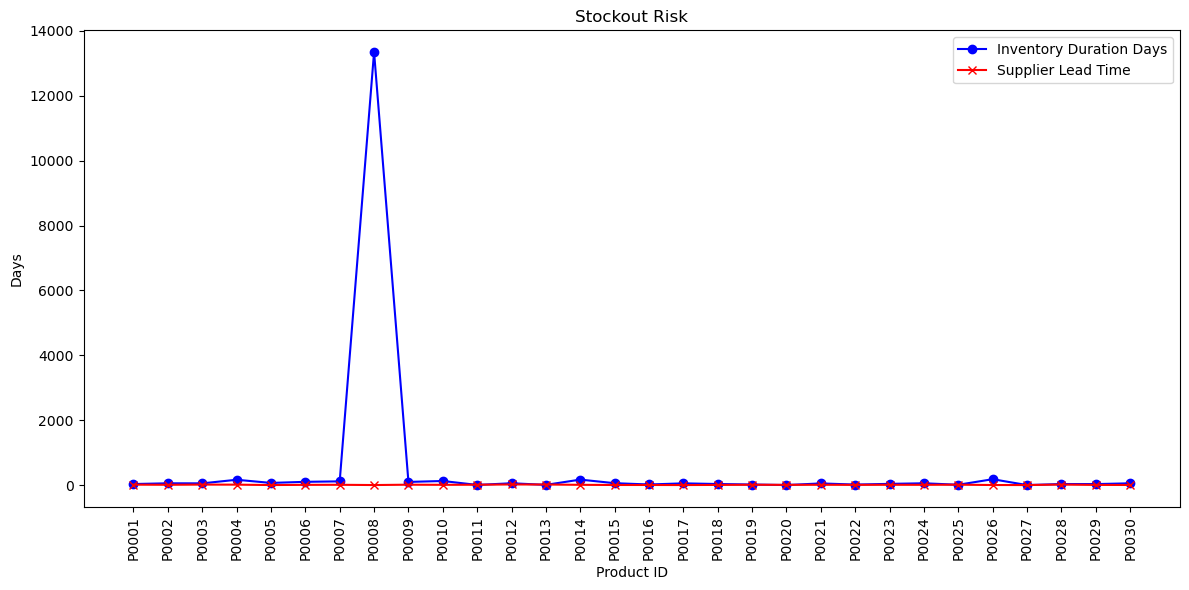

In [11]:
#3 Line Graph: "Stockout Risk"

# Assuming the DataFrame is available (either slow_movers_df or slow_movers_filtered)
plt.figure(figsize=(12, 6))

# Plot inventory_duration_days
plt.plot(df['product_id'], df['inventory_duration_days'], label='Inventory Duration Days', color='blue', marker='o')

# Plot supplier_lead_time
plt.plot(df['product_id'], df['supplier_lead_time'], label='Supplier Lead Time', color='red', marker='x')

plt.title('Stockout Risk')
plt.xlabel('Product ID')
plt.ylabel('Days')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

Follow-Up Prompt:

I'm getting the following error from the bar graphs:

FutureWarning: 
Passing palette without assigning hue is deprecated and will be removed in v0.14.0. Assign the x variable to hue and set legend=False for the same effect.
sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_filtered, palette='Reds_d')

Please revise the code to resolve this error. 

Additionally, the line graph might not be the best option here. As a Data Analyst, what chart option would you recommend to display inventory duration days and supplier lead time?

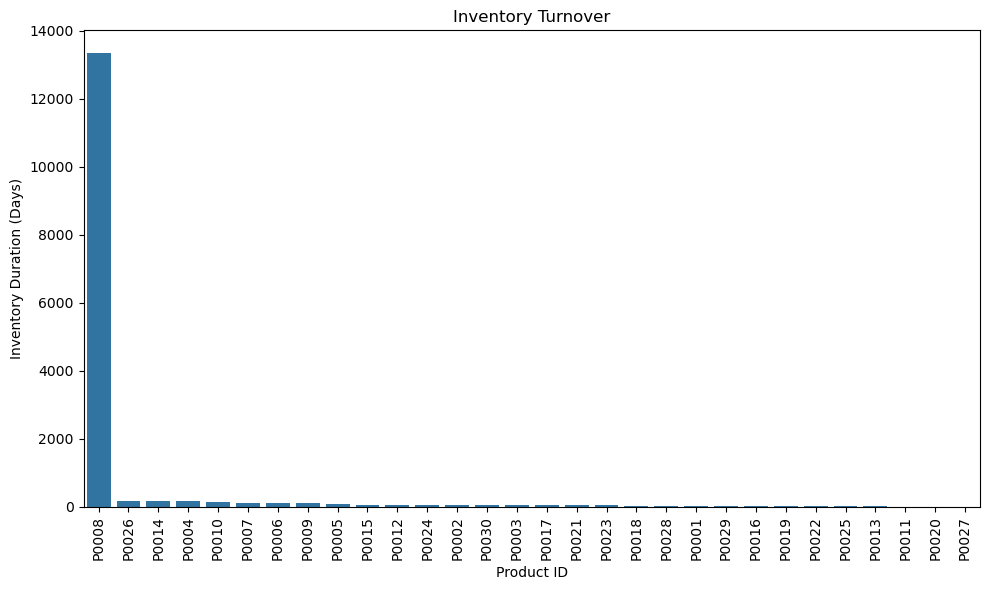

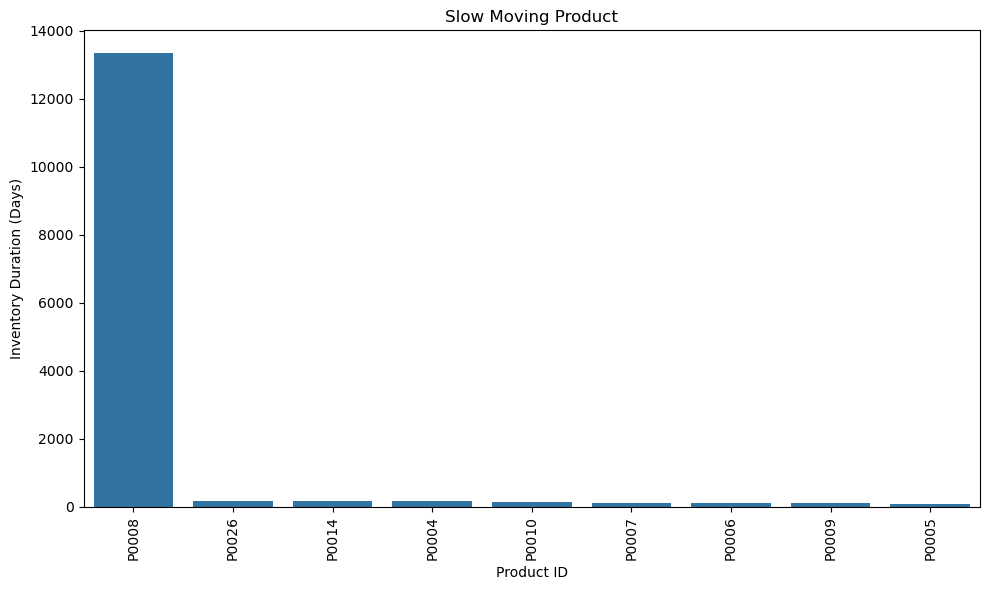

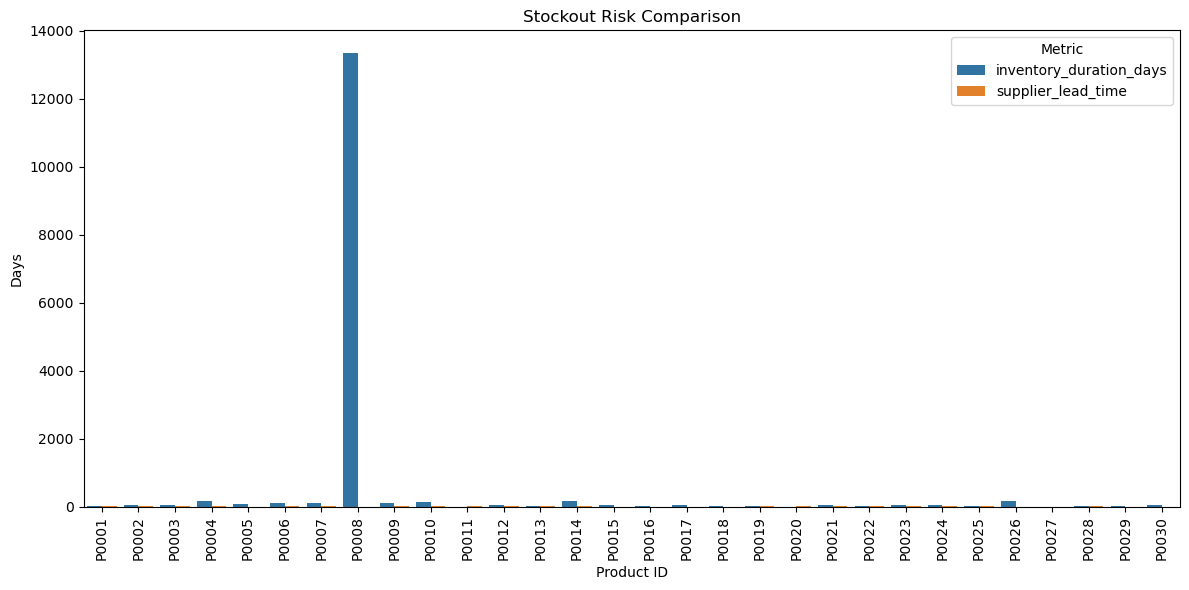

In [13]:
# Fixing the Bar Graph by avoiding the 'palette' argument without hue
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_df)
plt.title('Inventory Turnover')
plt.xlabel('Product ID')
plt.ylabel('Inventory Duration (Days)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Repeat for the second bar chart (slow_movers_filtered)
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='inventory_duration_days', data=slow_movers_filtered)
plt.title('Slow Moving Product')
plt.xlabel('Product ID')
plt.ylabel('Inventory Duration (Days)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# For comparing inventory_duration_days and supplier_lead_time, a side-by-side bar 
# chart or a clustered bar chart would be ideal. It will allow for easy comparison of 
# both metrics for each product.
# This approach will plot both inventory_duration_days and supplier_lead_time for each 
# product side by side, making it clear which products have higher or lower inventory 
# durations relative to their lead times.

# Side-by-side bar chart
import numpy as np

# Reshaping data for side-by-side bar plot (melt)
df_melted = df[['product_id', 'inventory_duration_days', 'supplier_lead_time']].melt(id_vars='product_id', var_name='Metric', value_name='Days')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='Days', hue='Metric', data=df_melted)
plt.title('Stockout Risk Comparison')
plt.xlabel('Product ID')
plt.ylabel('Days')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Discussion questions:

1. How did different prompts handle date calculations? 

The only hiccup I had with date calculation was in setting up the initial dataframe. Here, ChatGPT defaulted to setting the restock date in YYYY/MM/DD HH:MM:SS.SSSSSS format. In my follow up prompt, I requested only the date and for it to be in MM/DD/YYYY format. 

2. What visualization approaches were suggested?

I asked for a visualization suggestion for the third chart after my line graph idea didn't come out the way I was hoping for. Perhaps with some more time I could have worked it to display the data the way I wanted it to, but I actually prefer the side-by-side bar chart that AI recommended. I think it's a much cleaner visual. 

3. How was error handling implemented?

Being able to run each section of code while working through this exercise allowed me to see the outputs through and step and make adjustments accordingly. Most of my follow-up prompts involved tweaking my requests to be more specific so I was looking at a lot of extra data. The only "error" I received was a future warning for the way hues were applied to the charts. In my follow up prompt, I included the full error message and the issue was fixed. In actual practice, it would be nice to take this base code and change the formatting myself. 